# Project 2

## To build an effective price predicting model in order to provide reliable and accurate insights into the house prices of Aimes, Iowa.


###### With the given data on the past housing together with the saleprice, a model is to be created to best predict the saleprice with the inputs of a new housing data. As potential homebuyers who are interested in houses of Aimes, Iowa, they would like to find out the estimated price for a certain type of conditions for their house. This model that is to be created will be very helpful to aid them in finding the house that is within their budget.

Import all necessary libraries needed for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display
from sklearn.metrics import mean_squared_error
from cycler import cycler
from ipywidgets import interact
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

%matplotlib inline

## Executive Summary

### Contents:
- [Data import and Cleaning for the train set](#Data-import-and-Cleaning-for-the-train-set)
- [Exploratory Data Analysis for the train set](#Exploratory-Data-Analysis-for-the-train-set)
- [Data Visualization for the train set](#Data-Visualization-for-the-train-set)
- [Inferential Statistics for the train set](#Inferential-Statistics-for-the-train-set)
- [Train-Test-Split for the training model with Linear, Lasso and Ridge Regression](#Train-Test-Split-for-the-training-model-with-Linear,-Lasso-and-Ridge-Regression)
- [Data import and Cleaning for the test set](#Data-import-and-Cleaning-for-the-test-set)
- [Exploratory Data Analysis for the test set](#Exploratory-Data-Analysis-for-the-test-set)
- [Transform the input and predict the SalePrice](#Transform-the-input-and-predict-the-SalePrice)
- [Conclusion](#Conclusion)

# Data import and Cleaning for the train set

###### 1. Read in the `train.csv` files and assign to appropriately named pandas dataframes.

In [2]:
pd1 = pd.read_csv('../datasets/train.csv')
pd1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
pd1.shape

(2051, 81)

###### 2. Convert column names to `lowercase` and replace spaces with `_` 

In [4]:
pd1.columns = [p.lower().replace(' ','_') for p in pd1.columns]
pd1

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


###### 3. Check for nulls and columns' type

In [5]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

###### 4. Summarize the nulls by `sum()` and `sort_values()`

In [6]:
pd1.isnull().sum().sort_values(ascending=False)[0:27]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
dtype: int64

## Exploratory Data Analysis for the train set

###### 1. Assign `nominal`, `ordinal`, `discrete` and `continuous` variables to respective assignments to segregate them

In [7]:
nominal = pd1[['ms_subclass','ms_zoning','street','land_contour','lot_config','neighborhood','condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','sale_type']]

In [8]:
ordinal = pd1[['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]

In [9]:
discrete = pd1[['year_built','year_remod/add','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars','mo_sold','yr_sold']]

In [10]:
continuous = pd1[['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area','garage_area','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val','saleprice']]

###### 2. `Drop` necessary columns based on own judgement

In [11]:
pd1.drop('misc_feature',axis=1,inplace=True)
pd1.drop('alley',axis=1,inplace=True)

###### 3. Define `functions` to fill nulls and convert categorical variables into numeric using `pd.get_dummies()` and `LabelEncoder()`

In [12]:
def fill_continuous(features):
    for f in features:
        mean = pd1[[f]].mean()
        pd1[[f]] = pd1[[f]].fillna(value=mean)

In [13]:
fill_continuous(continuous)

In [14]:
def fill_ordinal(features):
    le = LabelEncoder()
    for f in features:
        pd1[[f]] = pd1[[f]].fillna(value='na')
        pd1[[f]] = le.fit_transform(pd1[[f]])

In [15]:
fill_ordinal(ordinal)

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
def fill_nominal(features):
    features['ms_subclass'] = features['ms_subclass'].astype(str)
    for f in features:
        pd1[[f]] = features[[f]].fillna(value='na')
    df = pd.get_dummies(features)
    return df

In [17]:
a = fill_nominal(nominal)

C:\Users\Willy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df = pd1.join(a)

In [19]:
df.dropna(subset=['garage_yr_blt','bsmt_full_bath','bsmt_half_bath','garage_cond'],inplace=True)

## Data Visualization for the train set

###### 1. Select strong correlation features and plot `sns.heatmap()` to look for correlation

In [20]:
df.corr()[['saleprice']].abs().sort_values(by='saleprice',ascending=False).head(11)

,saleprice
saleprice,1.000000
overall_qual,0.796473
gr_liv_area,0.701952
exter_qual,0.680732
kitchen_qual,0.658500
garage_cars,0.647190
garage_area,0.642711
bsmt_qual,0.630839
total_bsmt_sf,0.625107
1st_flr_sf,0.614998


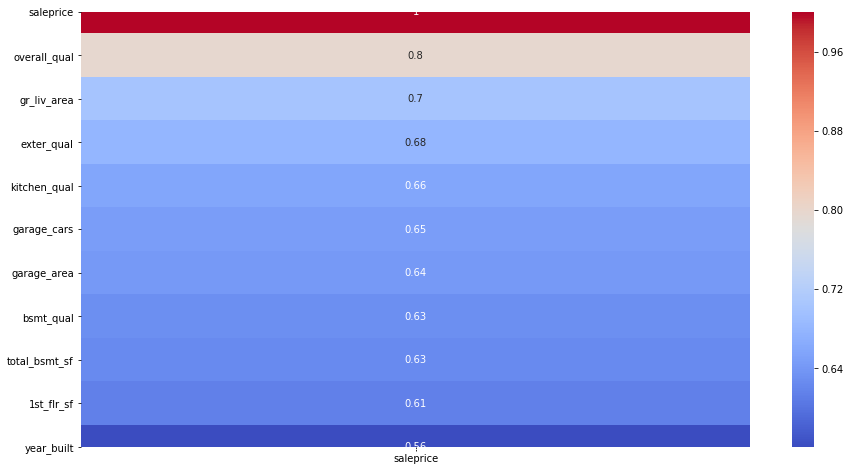

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()[['saleprice']].abs().sort_values(by='saleprice',ascending=False).head(11),cmap='coolwarm',annot=True);

In [22]:
corr = df[['overall_qual','gr_liv_area','exter_qual','kitchen_qual','garage_cars','garage_area','bsmt_qual','total_bsmt_sf','1st_flr_sf','year_built']]
target = df[['saleprice']]
hm_df = corr.join(target)

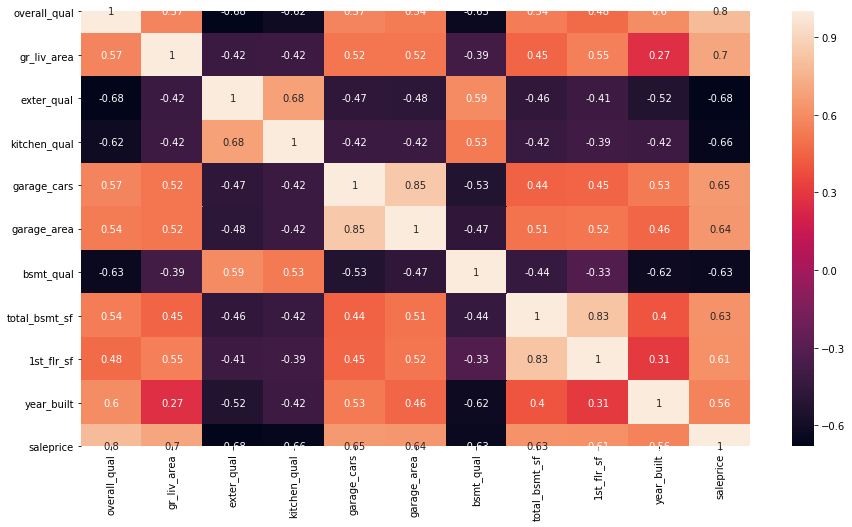

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(hm_df.corr(),annot=True);

###### 2. Identify and remove outliers using `Z-score` 

In [24]:
z = np.abs(stats.zscore(hm_df))
print(z)

[[0.14308535 0.07177376 0.69812697 ... 1.14848902 0.08772574 0.70243658]
 [0.57419485 1.23101963 0.69812697 ... 0.67044526 0.77206074 0.43212664]
 [0.86036556 0.92679525 0.69309413 ... 0.30428409 0.69925952 0.97498529]
 ...
 [0.14308535 0.80756112 0.69309413 ... 0.01186371 1.55467827 0.11297078]
 [1.57764577 0.63706048 0.69309413 ... 0.0593343  0.59660927 0.53130135]
 [0.57419485 0.58671434 0.69309413 ... 0.37802488 0.87471099 0.03914943]]


In [25]:
threshold = 3
print(np.where(z > 3))

(array([  12,   29,   29,   40,   40,   65,   77,   77,   77,   81,   94,
         96,   97,  128,  128,  128,  140,  171,  177,  178,  182,  187,
        187,  189,  218,  236,  264,  269,  272,  299,  311,  311,  311,
        311,  315,  315,  315,  315,  319,  319,  337,  374,  378,  392,
        409,  439,  454,  471,  482,  482,  490,  492,  499,  499,  502,
        502,  525,  548,  579,  587,  588,  588,  588,  588,  600,  601,
        644,  644,  647,  647,  647,  647,  664,  710,  737,  739,  739,
        751,  751,  751,  772,  772,  772,  790,  824,  830,  858,  861,
        870,  870,  879,  879,  885,  894,  901,  901,  901,  901,  901,
        924,  924,  936,  954,  958,  971,  971,  992,  992,  994,  994,
       1014, 1014, 1017, 1021, 1048, 1048, 1048, 1048, 1065, 1070, 1071,
       1077, 1088, 1088, 1094, 1094, 1094, 1094, 1096, 1100, 1100, 1118,
       1156, 1156, 1156, 1156, 1158, 1172, 1221, 1222, 1222, 1228, 1301,
       1308, 1312, 1329, 1349, 1413, 1416, 1430, 1

In [26]:
hm_df = hm_df[(z < 3).all(axis=1)]

## Inferential Statistics for the train set

###### 1. `Describe()` dataframe of  the selected features and plot `boxplot` to check for outliers

In [27]:
hm_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall_qual,1801.0,5.077179,1.227072,2.0,4.0,5.0,6.0,8.0
gr_liv_area,1801.0,1468.580233,430.659619,492.0,1136.0,1432.0,1699.0,2956.0
exter_qual,1801.0,2.616324,0.501043,1.0,2.0,3.0,3.0,3.0
kitchen_qual,1801.0,2.426430,0.719762,0.0,2.0,3.0,3.0,3.0
garage_cars,1801.0,1.820655,0.598643,1.0,1.0,2.0,2.0,3.0
garage_area,1801.0,481.851194,167.476907,100.0,352.0,480.0,576.0,1053.0
bsmt_qual,1801.0,2.803443,1.253532,0.0,2.0,2.0,4.0,5.0
total_bsmt_sf,1801.0,1033.189895,376.390650,0.0,797.0,988.0,1277.0,2223.0
1st_flr_sf,1801.0,1135.194336,332.639443,448.0,880.0,1080.0,1362.0,2259.0
year_built,1801.0,1972.416435,28.584317,1890.0,1955.0,1974.0,2000.0,2010.0


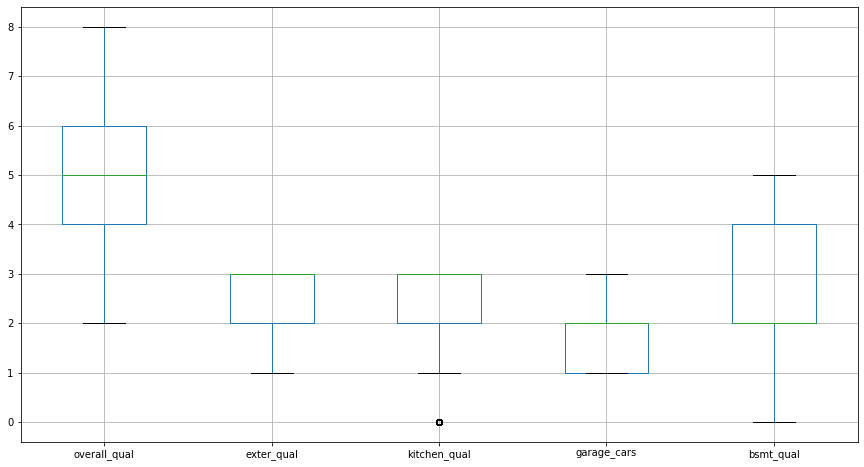

In [28]:
s1 = ['overall_qual','exter_qual','kitchen_qual','garage_cars','bsmt_qual']
s2 = ['gr_liv_area','garage_area','total_bsmt_sf','1st_flr_sf','year_built']
hm_df[[k for k in s1]].boxplot(figsize=(15,8));

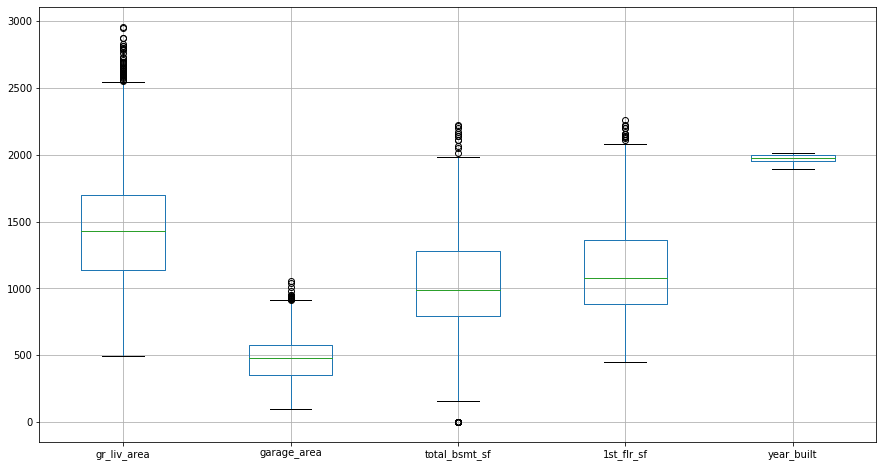

In [29]:
hm_df[[k for k in s2]].boxplot(figsize=(15,8));

###### 2. Plot `scatter` and `histogram` to understand the selected features and their correlation

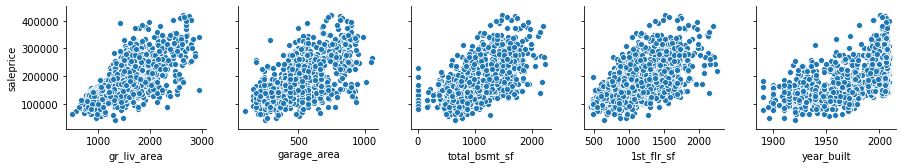

In [30]:
sns.pairplot(hm_df, x_vars = ['gr_liv_area','garage_area','total_bsmt_sf','1st_flr_sf','year_built'], y_vars = ['saleprice']);

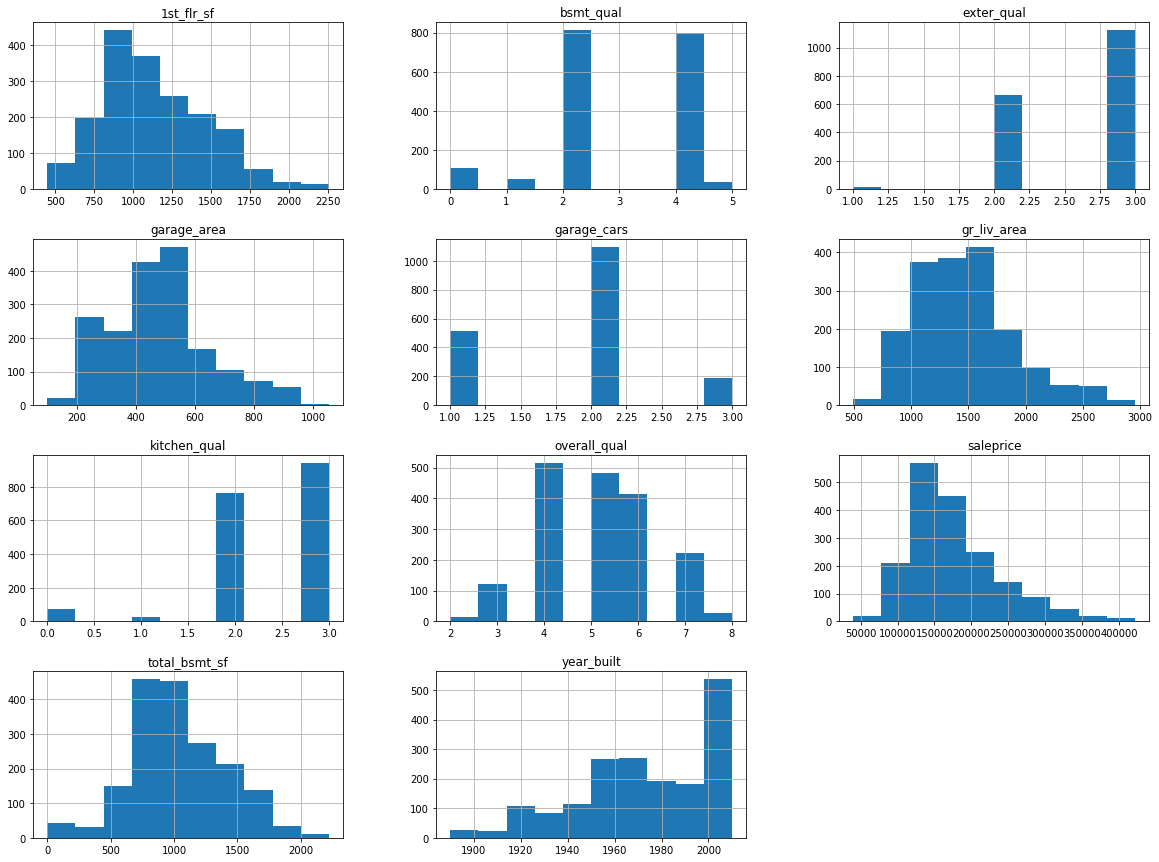

In [31]:
hm_df.hist(figsize = (20,15));

## Train-Test-Split for the training model with Linear, Lasso and Ridge Regression

###### 1. Split the selected features as `X` and the saleprice as `y`

In [32]:
X = hm_df[['overall_qual','gr_liv_area','exter_qual','kitchen_qual','garage_cars','garage_area','bsmt_qual','total_bsmt_sf','1st_flr_sf','year_built']]
y = hm_df[['saleprice']]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

###### 2. Use `StandardScaler()` to scale the training model

In [33]:
ss = StandardScaler()

In [34]:
X_train_ss = ss.fit_transform(X_train)

In [35]:
X_test_scaled = ss.transform(X_test)

In [36]:
lr = LinearRegression()
lr.fit(X_train_ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### 3. Calculate the X_train_ss and X_test_scaled score using `.score()` to check for accuracy

In [37]:
lr.score(X_train_ss,y_train)

0.8154824252896787

In [38]:
lr.score(X_test_scaled,y_test)

0.8341557209875206

In [39]:
predict = pd.DataFrame(lr.predict(X_test_scaled))

###### 4. Calculate the `MSE` and `RSME` for the predicted results

In [40]:
mean_squared_error(y_test, predict)

654037744.1469773

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
rmse

25574.161650911985

###### 5. Plot the `Predicted saleprice` against `Actual saleprice` with the line of best fit

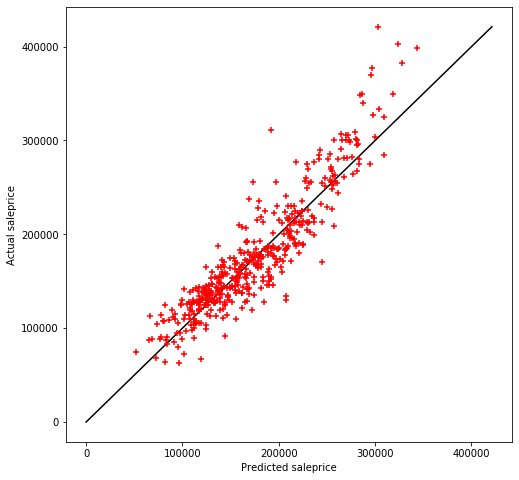

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(lr.predict(X_test_scaled), y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted saleprice")
plt.ylabel("Actual saleprice")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

###### 6. Using `statsmodel.OLS()`, look out for features that are not significant to be removed

In [43]:
X = sm.add_constant(X_train_ss)
model = sm.OLS(y_train,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     591.8
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:25:22   Log-Likelihood:                -15645.
No. Observations:                1350   AIC:                         3.131e+04
Df Residuals:                    1339   BIC:                         3.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.749e+05    713.283    245.154      0.000    1.73e+05    1.76e+05
x1          1.692e+04   1139.403     14.852      0.000    1.47e+04    1.92e+04
x2          1.954e+04    927.366     21.067      0.000    1.77e+04    2.14e+04
x3           135.5226   1006.159      0.135      0.893   -1838.296    2109.341
x4         -7849.9231    902.138     -8.701      0.000   -9619.681   -6080.165
x5          -983.3183   1444.287     -0.681      0.496   -3816.630    1849.993
x6          6696.9378   1344.300      4.982      0.000    4059.775    9334.100
x7         -4636.2393    995.706     -4.656      0.000   -6589.554   -2682.925
x8          8518.8457   1226.005      6.948      0.000    6113.745    1.09e+04
x9          4425.8282   1224.754      3.614      0.000    2023.182    6828.474
x10         8672.0652   1029.286      8.425      0.000    6652.877    1.07e+04
==============================================================================
Omnibus:                      131.777   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.647
Skew:                           0.220   Prob(JB):                    1.01e-168
Kurtosis:                       6.682   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 7. Split the selected features as `X` and the saleprice as `y` after removing insignificant features in `X`

In [44]:
X2 = hm_df[['overall_qual','gr_liv_area','kitchen_qual','garage_area','bsmt_qual','total_bsmt_sf','1st_flr_sf','year_built']]
y2 = hm_df[['saleprice']]
X_train,X_test,y_train,y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42)

###### 8. Use `StandardScaler()` to scale the training model

In [45]:
ss = StandardScaler()

In [46]:
X_train_ss = ss.fit_transform(X_train)

In [47]:
X_test_scaled = ss.transform(X_test)

In [48]:
lr = LinearRegression()
lr.fit(X_train_ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### 9. Calculate the X_train_ss and X_test_scaled score using `.score()` to check for accuracy 

In [49]:
lr.score(X_train_ss,y_train)

0.8154160973572675

In [50]:
lr.score(X_test_scaled,y_test)

0.8345751881820926

###### 10. Plot the `Predicted saleprice` against `Actual saleprice` with the line of best fit

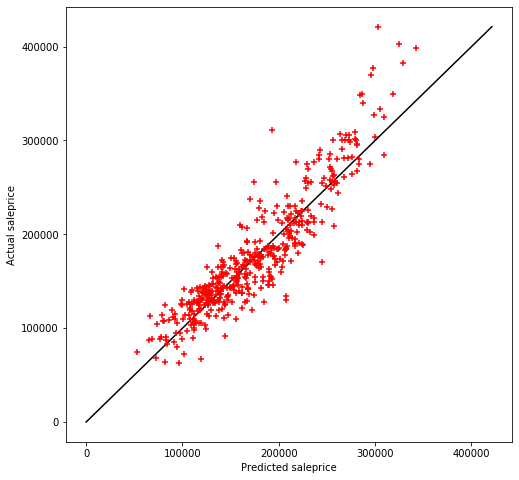

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(lr.predict(X_test_scaled), y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted saleprice")
plt.ylabel("Actual saleprice")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

###### 11. Using `statsmodel.OLS()`, check if any insignificant features are still in the model

In [52]:
X = sm.add_constant(X_train_ss)
model = sm.OLS(y_train,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     740.5
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                -15645.
No. Observations:                1350   AIC:                         3.131e+04
Df Residuals:                    1341   BIC:                         3.135e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.749e+05    712.879    245.293      0.000    1.73e+05    1.76e+05
x1          1.682e+04   1105.562     15.218      0.000    1.47e+04     1.9e+04
x2          1.944e+04    915.577     21.229      0.000    1.76e+04    2.12e+04
x3         -7822.9091    865.574     -9.038      0.000   -9520.936   -6124.882
x4          6018.2081    906.843      6.636      0.000    4239.223    7797.194
x5         -4525.0653    976.711     -4.633      0.000   -6441.114   -2609.017
x6          8568.3337   1222.348      7.010      0.000    6170.412     1.1e+04
x7          4401.0386   1221.689      3.602      0.000    2004.408    6797.669
x8          8530.7001    991.944      8.600      0.000    6584.770    1.05e+04
==============================================================================
Omnibus:                      131.914   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.230
Skew:                           0.221   Prob(JB):                    7.55e-169
Kurtosis:                       6.683   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 12. Calculate the best alpha value  using `RidgeCV` and get the mean of the score

In [53]:
r_alphas = np.logspace(0, 5, 200)
get_alpha = RidgeCV(r_alphas, cv=10)
get_alpha.fit(X_train_ss,y_train)
get_alpha.alpha_

34.09285069746813

In [54]:
ridge = Ridge(get_alpha.alpha_)
ridge_score = cross_val_score(get_alpha,X_train_ss,y_train)
ridge_score.mean()

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.810942033728904

###### 13. Calculate the best alpha value  using `LassoCV` and get the mean of the score

In [55]:
f_alphas = 500
get_f_alpha = LassoCV(n_alphas=f_alphas, cv=10)
get_f_alpha.fit(X_train_ss,y_train)
get_f_alpha.alpha_

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47.045339472991735

In [56]:
lasso = Lasso(get_f_alpha.alpha_)
lasso_score = cross_val_score(get_f_alpha,X_train_ss,y_train)
lasso_score.mean()

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

0.8108872296909183

## Data import and Cleaning for the test set

###### 1. Read in the `test.csv` files and assign to appropriately named pandas dataframes

In [57]:
pd2 = pd.read_csv('../datasets/test.csv')

###### 2. Convert column names to `lowercase` and replace spaces with `_` 

In [58]:
pd2.columns = [p.lower().replace(' ','_') for p in pd2.columns]
pd2

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


## Exploratory Data Analysis for the test set

###### 1. Assign `nominal`, `ordinal`, `discrete` and `continuous` variables to respective assignments to segregate them

In [59]:
nominal2 = pd2[['ms_subclass','ms_zoning','street','land_contour','lot_config','neighborhood','condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','sale_type']]

In [60]:
ordinal2 = pd2[['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]

In [61]:
discrete2 = pd2[['year_built','year_remod/add','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars','mo_sold','yr_sold']]

In [62]:
continuous2 = pd2[['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area','garage_area','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val']]

###### 2. Define `functions` to fill nulls and convert categorical variables into numeric using `pd.get_dummies()` and `LabelEncoder()`

In [63]:
def fill_continuous(features):
    for f in features:
        mean = pd2[[f]].mean()
        pd2[[f]] = pd2[[f]].fillna(value=mean)

In [64]:
fill_continuous(continuous2)

In [65]:
def fill_ordinal(features):
    le = LabelEncoder()
    for f in features:
        pd2[[f]] = pd2[[f]].fillna(value='na')
        pd2[[f]] = le.fit_transform(pd2[[f]])

In [66]:
fill_ordinal(ordinal2)

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
def fill_nominal(features):
    features['ms_subclass'] = features['ms_subclass'].astype(str)
    for f in features:
        pd2[[f]] = features[[f]].fillna(value='na')
    df = pd.get_dummies(features)
    return df

In [68]:
a = fill_nominal(nominal2)

C:\Users\Willy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df = pd2.join(a)

## Transform the input and predict the SalePrice

###### 1. Select the variables from the training set and assign to `X` and transform using `.transform()`

In [70]:
X = df[['overall_qual','gr_liv_area','kitchen_qual','garage_area','bsmt_qual','total_bsmt_sf','1st_flr_sf','year_built']]

In [71]:
X = ss.transform(X)

###### 2. Using the best training model, predict the test set's saleprice using `.predict()`

In [72]:
predict = lr.predict(X)
print(predict)

[[179916.46643711]
 [192177.12466739]
 [175532.67848927]
 [ 83437.96607883]
 [152283.07768987]
 [ 67744.5568548 ]
 [ 79150.80870844]
 [145098.92950518]
 [195803.09308328]
 [136450.83633467]
 [167061.4042248 ]
 [ 97789.86281616]
 [138408.36046958]
 [250634.57440132]
 [125918.45834582]
 [ 81677.71055257]
 [133014.57231222]
 [ 96799.09813819]
 [161627.19051623]
 [165685.94673519]
 [118830.56624589]
 [ 95279.89441114]
 [201921.49581832]
 [113383.71607809]
 [188834.12730732]
 [ 84846.98077523]
 [ 98550.93243031]
 [146746.48103781]
 [135357.94326321]
 [ 44167.27722519]
 [ 82404.13155903]
 [ 77612.78641954]
 [221226.43671748]
 [143227.9721755 ]
 [210671.3235156 ]
 [173001.86139796]
 [128548.62092045]
 [ 51744.46036603]
 [ 88921.3098138 ]
 [199270.57670277]
 [152380.06679749]
 [201396.00993468]
 [144794.19777989]
 [109125.51460626]
 [203791.06125182]
 [ 71757.89787025]
 [203381.63749747]
 [ 86052.1262705 ]
 [ 84412.83877126]
 [ 95018.44045798]
 [ 84756.6408617 ]
 [200368.09199112]
 [245389.689

###### 3. Convert the array into `DataFrame` with the columns including `'id'` and `'SalePrice'`

In [73]:
final = pd.DataFrame(predict, columns=['SalePrice'])

In [74]:
final['id']=pd2['id']
final = final[['id','SalePrice']]

In [75]:
final.head()

,id,SalePrice
0,2658,179916.466437
1,2718,192177.124667
2,2414,175532.678489
3,1989,83437.966079
4,625,152283.077690


###### 4. Save predicted SalePrice into `.csv`

In [76]:
final.to_csv('../datasets/y_hat.csv', index=False)

# Conclusion

Linear regression model was chosen to predict the sale price of houses in Aimes, Iowa. It was chosen over Lasso and Ridge regression because it gave the best score among the three, although the differences were small.
This model is sufficient to help potential buyers to get a rough estimate of the sale prices therefore preparing them mentally and financially for their future. Housing agents can also rely on this model to help their buyers get their ideal house that is within their budget. 

For an even more accurate prediction of the sale price of houses, a more advance technique is recommended. 

- [Back to Executive Summary](#Contents:)